$$\Large \textbf{Loading Normal Data Predictions}$$

-------

In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np
import pickle
import pandas
import cv2
import os

In [528]:
def pickle_read(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    return data

def pickle_write(a, b):
    pickle_filename = a if len(a) >= 4 and a[-4:] == ".pkl" else b
    data = b if pickle_filename == a else a
    with open(pickle_filename, 'wb') as file:
        pickle.dump(data, file)

In [622]:
backflip_dataset = False
data_load = {
    "jar/InternVideo-a8.pkl": "IV_a8",
    "jar/InternVideo-a11.pkl": "IV_a11",
    "jar/CLIP-a.pkl": "CLIP_a",
    "jar/CLIP-r.pkl": "CLIP_r",
    "jar/CLIP-g.pkl": "CLIP_g",
    "jar/InternVideo-r8.pkl": "IV_r8",
    "jar/InternVideo-r11.pkl": "IV_r11",
    "jar/InternVideo-r13.pkl": "IV_r13",
    "jar/InternVideo-a13.pkl": "IV_a13",
    "jar/InternVideo-r12.pkl": "IV_r12",
    "jar/InternVideo-a12.pkl": "IV_a12",
    "jar/InternVideo-r9.pkl": "IV_r9",
    "jar/InternVideo-a9.pkl": "IV_a9",
    "jar/InternVideo-a15.pkl": "IV_a15",
    "jar/InternVideo-r15.pkl": "IV_r15",
    "jar/InternVideo-a17.pkl": "IV_a17",
    "jar/InternVideo-r17.pkl": "IV_r17",
    "jar/InternVideo-r19.pkl": "IV_r19",
    "jar/InternVideo-a19.pkl": "IV_a19",
    "jar/InternVideo-g8.pkl": "IV_g8",
    "jar/InternVideo-g11.pkl": "IV_g11",
    "jar/InternVideo-g13.pkl": "IV_g13",
    # "jar/InternVideo-a100.pkl": "IV_a100",
    # "jar/InternVideo-r100.pkl": "IV_r100",
    
}

for key, value in data_load.items():
    exec(f'{value} = pickle_read(\'{key}\')')

logits_r = pickle_read('rustyjar/InternVideo-logits-r.pkl')
logits_a = pickle_read('rustyjar/InternVideo-logits-a.pkl')
logits_g = pickle_read('rustyjar/InternVideo-logits-g.pkl')

if backflip_dataset:
    raw_data = pandas.read_csv('anno_backflip.csv')
    data = []
    for index, row in raw_data.iterrows():
        data.append((row['ID'], eval('[' + row['Frame(s)'] + ']')))
else:
    data = pickle_read('rustyjar/GIF87.pkl')

print(len(IV_a8), 'predictions loaded.')
print("First 10 Predictions from Intern Video:      ", IV_a8[:10])
print("First 10 predictions from CLIP:              ", CLIP_a[:10])
print("-"*50)
print("First 10 actual values:", [x[1] for x in data[:10]])

50 predictions loaded.
First 10 Predictions from Intern Video:       [269, 68, 217, 140, 177, 131, 52, 73, 63, 177]
First 10 predictions from CLIP:               [237, 76, 216, 72, 197, 16, 53, 90, 20, 180]
--------------------------------------------------
First 10 actual values: [[19], [9], [28], [14], [10], [29], [22], [67], [19], [40]]


In [623]:
data

[(1, [19]),
 (2, [9]),
 (3, [28]),
 (4, [14]),
 (5, [10]),
 (6, [29]),
 (7, [22]),
 (8, [67]),
 (9, [19]),
 (10, [40]),
 (11, [53]),
 (12, [59]),
 (13, [10]),
 (14, [48]),
 (15, [289]),
 (16, [113]),
 (17, [52]),
 (18, [13]),
 (19, [131]),
 (20, [251]),
 (21, [8]),
 (22, [152]),
 (23, [51]),
 (24, [89]),
 (25, [28]),
 (26, [6]),
 (27, [12]),
 (28, [26]),
 (29, [15]),
 (30, [9]),
 (31, [6]),
 (32, [3]),
 (33, [3]),
 (34, [12]),
 (35, [34]),
 (36, [16]),
 (37, [13]),
 (38, [74]),
 (39, [90]),
 (40, [19]),
 (41, [61]),
 (42, [14]),
 (43, [152]),
 (44, [19]),
 (45, [12]),
 (46, [285]),
 (47, [20]),
 (48, [82]),
 (49, [40]),
 (50, [71]),
 (51, [15]),
 (52, [4]),
 (53, [18]),
 (54, [11]),
 (55, [6]),
 (56, [24]),
 (57, [11]),
 (58, [27]),
 (59, [14]),
 (60, [0]),
 (61, [22]),
 (62, [248]),
 (63, [165]),
 (64, [120]),
 (65, [65]),
 (66, [152]),
 (67, [147]),
 (68, [5]),
 (69, [267]),
 (70, [184]),
 (71, [37]),
 (72, [82]),
 (73, [65]),
 (74, [32]),
 (75, [220]),
 (76, [144]),
 (77, [81]),
 (7

In [541]:
correct = pickle_read('rustyjar/GIF87.pkl')
print(correct[-5:])

[('GIF87/83.mp4', (83, 'soccer ball hits guy in face', 21)), ('GIF87/84.mp4', (84, 'A person dunks a basketball.', 300)), ('GIF87/85.mp4', (85, 'A person faceplanting on the ground.', 56)), ('GIF87/86.mp4', (86, 'ball hits face', 4)), ('GIF87/87.mp4', (87, "ball hits guy's head", 2))]


In [593]:
IV_g13 = []
logits_37 = []
for idx, logits in enumerate(logits_g):
    logits_sort = copy.deepcopy(logits)

    avg_logits = []

    for i in range(2, len(logits) - 2):
        if idx == 37:
            logits_37.append((sum([logits[x][0] for x in [i - 2, i - 1, i, i + 1, i + 2]])/5, i + 1))
        avg_logits.append((sum([logits[x][0] for x in [i - 2, i - 1, i, i + 1, i + 2]])/5, i + 1))
    
    avg_logits.sort(key = lambda x: -x[0])
    IV_g13.append(avg_logits[0][1])
    

print(IV_g13[-5:])
pickle_write(IV_g13, 'jar/InternVideo-g13.pkl')

[239, 289, 48, 133, 127]


20


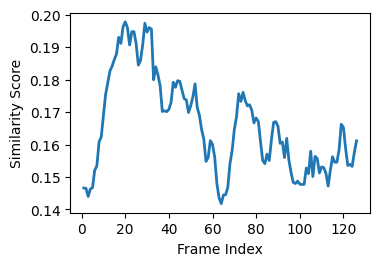

In [465]:
print(IV_a100[38])
plt.figure(figsize=[3, 2])
plt.plot([x[1] for x in logits_a[38]], [x[0] for x in logits_a[38]], linewidth=2)
plt.xlabel("Frame Index")
plt.ylabel("Similarity Score")

plt.gca().set_position([0, 0, 1, 1])
plt.savefig('frame-similarity-score.svg', bbox_inches="tight")

plt.show()

In [400]:
IV_r11[0]

268

$$\Large \textbf{Loading Augmented Data Predictions}$$

-------

In [88]:
def showMetric(preds, tick = 2, compare = False):
    def clamp_error(prediction, truth): # NN's Idea
        if truth in range(prediction, prediction + 9):
            return 0
        else: 
            return (prediction + 8) - truth if truth > prediction + 8 else prediction - truth
    
    score = 0
    offsets = []
    for idx, i_pred in enumerate(preds):
        within_range = False
        off = 10000
        for truth in data[idx][1]:
            if abs(i_pred - truth) < abs(off):
                off = i_pred - truth
    
            if abs(i_pred - truth) <= 8:
                within_range = True
        
        if within_range:
            score += 1
    
        offsets.append(off)
    
    score = score / 50
    print("Accuracy with |error| <= 8:",score)
    
    offsetsbruh = offsets[:39] + offsets[40:]

    if compare:
        plt.figure(figsize=(7, 7))
    else:
        plt.yticks(np.arange(-30, 30, 5))
        plt.ylim(-30, 30)
        plt.boxplot(offsetsbruh)
        plt.show()

Accuracy with |error| <= 8: 0.88


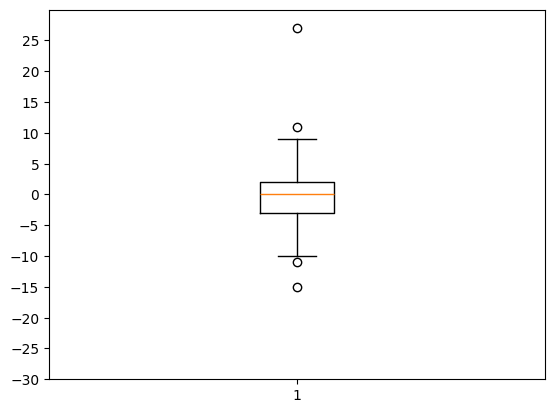

In [244]:
showMetric(IV_r13)

Accuracy with |error| <= 8: 0.76


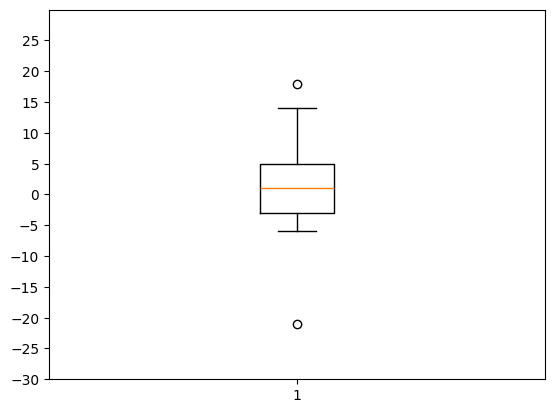

In [245]:
showMetric(CLIP_r, tick = 15)

In [91]:
norm_scale = []
for video_path in tqdm([os.path.join('backflip', x) for x in os.listdir('backflip')]):
    cap = cv2.VideoCapture(video_path)

    frame_num = 0
    success, frame = cap.read()
    while success:
        frame_num += 1
        success, frame = cap.read()
    cap.release()
    
    norm_scale.append(1 / frame_num)

print(norm_scale[:5])

  0%|          | 0/50 [00:00<?, ?it/s]

[0.009433962264150943, 0.005128205128205128, 0.008264462809917356, 0.004784688995215311, 0.011363636363636364]


$$\mathbf{2}^{\text{nd}}\text{ Metric}$$
--------

In [246]:
import matplotlib.pyplot as plt
import numpy as np

# Find closest peak
def findClosest(pred, truths):
    dist = 1000000
    peak = -1
    for i in truths:
        if abs(i - pred) < dist:
            dist = abs(i - pred)
            peak = i
    return peak

def showMetric2(preds, tick = 2):
    def clamp_error(prediction, truth): # NN's Idea
        if truth in range(prediction, prediction + 9):
            return 0
        else: 
            return (prediction + 8) - truth if truth > prediction + 8 else prediction - truth
    
    mse = []
    for idx, i_pred in enumerate(preds):
        # peak = findClosest(i_pred, data[idx][1]) * norm_scale[idx]
        peak = findClosest(i_pred, data[idx][1])
        # mse.append(abs((i_pred * norm_scale[idx]) - peak)) # Calculating MAE??
        mse.append(abs(i_pred - peak)) # Calculating MAE??
    
    return mse

def find_best_offset(preds):
    total = []
    min_val = float('inf')
    min_result = -1
    for l in [x/100 for x in range(-3000, 3000, 1)]:
        mse = calculateMSE([x + l for x in preds])
        total.append((l, mse))
        if mse < min_val:
            min_val = mse
            min_result = l
    return min_result

def calculateMSE(preds):
    errors = []
    for idx, i_pred in enumerate(preds):
        new_pred = i_pred + 0
        peak = findClosest(new_pred, data[idx][1])
        errors.append(abs(new_pred - peak)**2)
    return np.mean(errors).item()

In [247]:
calculateMSE(IV_r15)

36.94

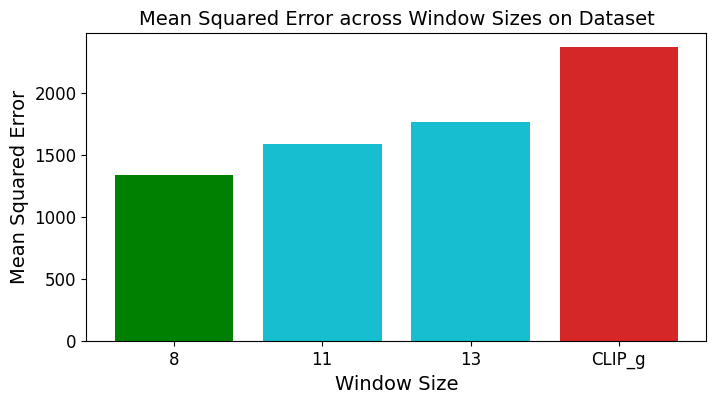

╒════╤═════════╤═════════╕
│    │ Model   │     MSE │
╞════╪═════════╪═════════╡
│  0 │ IV_g8   │ 1333.31 │
├────┼─────────┼─────────┤
│  1 │ IV_g11  │ 1584.86 │
├────┼─────────┼─────────┤
│  2 │ IV_g13  │ 1762.33 │
├────┼─────────┼─────────┤
│  3 │ CLIP_g  │ 2366.17 │
╘════╧═════════╧═════════╛


In [587]:
import matplotlib.pyplot as plt
from IPython.display import Latex
from tabulate import tabulate

showCLIP = True
filter_vals = 'g'

fig, ax = plt.subplots(figsize=(8, 4))

def extract_digits(input_string):
    digits = ''.join([char for char in input_string if char.isdigit()])
    return int(digits) if digits else 0

pred_labels = [x for x in (data_load.values() if showCLIP else filter(lambda x: 'CLIP' not in x, data_load.values()))]
pred_labels.sort(key=lambda x: (int(extract_digits(x)) if "IV" in x else 1000, x[3]))

if filter_vals != 'any':
    pred_labels = list(filter(lambda x: filter_vals in x, pred_labels))

predictions = [calculateMSE(eval(x)) for x in pred_labels]
pred_augment = [calculateMSE(eval(x)) for x in filter(lambda x: 'a' in x, pred_labels)]
best_mse = min(predictions)
best_augment_mse = min(pred_augment) if pred_augment else 0

def get_color(idx, x):
    if 'CLIP' in x:
        return 'tab:red'
    if predictions[idx] == best_mse:
        return 'green'
    elif predictions[idx] == best_augment_mse:
        return 'tab:cyan'
    else:
        if 'r' in x:
            return 'tab:cyan'
        else:
            return 'tab:cyan'

def get_name(x):
    if "CLIP" in x: return x
    return x.split("_")[1][1:] if "100" not in x else "Avg of 11, 13, 15"

bar_colors = [get_color(idx, x) for idx, x in enumerate(pred_labels)]

ax.bar([get_name(x) for x in pred_labels], predictions, label=pred_labels, color = bar_colors)

ax.set_ylabel('Mean Squared Error', fontsize=14)
ax.set_xlabel('Window Size', fontsize=14)
ax.set_title('Mean Squared Error across Window Sizes on Dataset', fontsize=14)
# ax.legend(title='Model')
# ax.set_ylim(40, 73)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig("window_size_comparison.svg", bbox_inches="tight")
plt.show()

combined = list(zip(pred_labels, predictions))
combined.sort(key = lambda x: x[1])

df = pd.DataFrame({'Model': [x[0] for x in combined], 'MSE': [x[1] for x in combined]})

print(tabulate(df, headers = 'keys', tablefmt = 'fancy_grid'))

# Window Size Plot
Line Graph of Window Size vs MSE

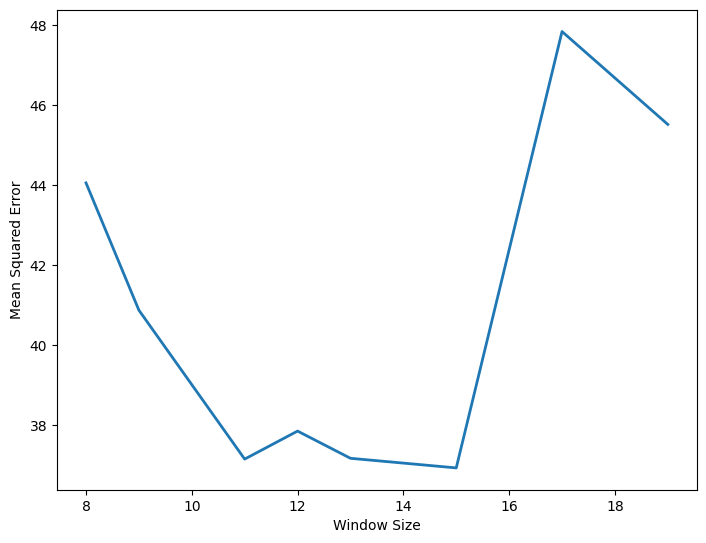

In [383]:
pred_labels = [x for x in filter(lambda x: 'CLIP' not in x, data_load.values())]
pred_labels.sort(key=lambda x: (int(extract_digits(x)), x[3]))

augment_labels = list(filter(lambda x: 'a' in x and '100' not in x, pred_labels))
regular_labels = list(filter(lambda x: 'r' in x and '100' not in x, pred_labels))

plt.plot([extract_digits(x) for x in regular_labels], [calculateMSE(eval(x)) for x in regular_labels], linewidth=2)

plt.gca().set_position([0, 0, 1, 1])
plt.xlabel("Window Size")
plt.ylabel("Mean Squared Error")


plt.savefig("windowsize-mse-r.svg", bbox_inches = "tight")
plt.show()

In [409]:
CLIP_r[18]

19

In [410]:
data[18]

(19, [286])

In [565]:
IV_g8[37]

258

In [607]:
logits_37 = logits_g[38]

In [608]:
logits_37_copy = copy.deepcopy(logits_37)
logits_37_copy.sort(key = lambda x: -x[0])
print(logits_37_copy[0][1])

90


In [606]:
stuff38 = [[0.2020391821861267, 1.0],
 [0.20196452736854553, 2.0],
 [0.20203155279159546, 3.0],
 [0.20146700739860535, 4.0],
 [0.20114903151988983, 5.0],
 [0.20138053596019745, 6.0],
 [0.20290768146514893, 7.0],
 [0.20426438748836517, 8.0],
 [0.2049144208431244, 9.0],
 [0.20397792756557465, 10.0],
 [0.20464573800563812, 11.0],
 [0.20271751284599304, 12.0],
 [0.2027658373117447, 13.0],
 [0.20145760476589203, 14.0],
 [0.2032621055841446, 15.0],
 [0.2030934989452362, 16.0],
 [0.2020760178565979, 17.0],
 [0.20207396149635315, 18.0],
 [0.2017778754234314, 19.0],
 [0.20177313685417175, 20.0],
 [0.20035970211029053, 21.0],
 [0.20109765231609344, 22.0],
 [0.20143841207027435, 23.0],
 [0.2004956603050232, 24.0],
 [0.20163719356060028, 25.0],
 [0.20405972003936768, 26.0],
 [0.20445242524147034, 27.0],
 [0.2017042487859726, 28.0],
 [0.2060074806213379, 29.0],
 [0.20924240350723267, 30.0],
 [0.210775688290596, 31.0],
 [0.21510131657123566, 32.0],
 [0.2147490531206131, 33.0],
 [0.220611110329628, 34.0],
 [0.22112123668193817, 35.0],
 [0.22313977777957916, 36.0],
 [0.2234959453344345, 37.0],
 [0.22376874089241028, 38.0],
 [0.22414854168891907, 39.0],
 [0.22496581077575684, 40.0],
 [0.22487974166870117, 41.0],
 [0.2280668467283249, 42.0],
 [0.23503299057483673, 43.0],
 [0.23533384501934052, 44.0],
 [0.23585008084774017, 45.0],
 [0.23619557917118073, 46.0],
 [0.23900637030601501, 47.0],
 [0.24024274945259094, 48.0],
 [0.23968106508255005, 49.0],
 [0.23977088928222656, 50.0],
 [0.2420104742050171, 51.0],
 [0.24123960733413696, 52.0],
 [0.24483731389045715, 53.0],
 [0.24226251244544983, 54.0],
 [0.2497280389070511, 55.0],
 [0.2534068524837494, 56.0],
 [0.25263911485671997, 57.0],
 [0.25904738903045654, 58.0],
 [0.25896257162094116, 59.0],
 [0.2610795497894287, 60.0],
 [0.25927624106407166, 61.0],
 [0.26200711727142334, 62.0],
 [0.250679075717926, 63.0],
 [0.2506866753101349, 64.0],
 [0.2507953345775604, 65.0],
 [0.2476627677679062, 66.0],
 [0.23563002049922943, 67.0],
 [0.24429206550121307, 68.0],
 [0.24241067469120026, 69.0],
 [0.24409857392311096, 70.0],
 [0.24683953821659088, 71.0],
 [0.25670212507247925, 72.0],
 [0.261128306388855, 73.0],
 [0.26253944635391235, 74.0],
 [0.2621226906776428, 75.0],
 [0.2598377764225006, 76.0],
 [0.2543940842151642, 77.0],
 [0.2509768605232239, 78.0],
 [0.22545462846755981, 79.0],
 [0.2423989325761795, 80.0],
 [0.24624091386795044, 81.0],
 [0.25008895993232727, 82.0],
 [0.24600636959075928, 83.0],
 [0.2715723514556885, 84.0],
 [0.27652353048324585, 85.0],
 [0.2810194194316864, 86.0],
 [0.286205530166626, 87.0],
 [0.28843405842781067, 88.0],
 [0.2878214120864868, 89.0],
 [0.2897486388683319, 90.0],
 [0.2769196629524231, 91.0],
 [0.27961277961730957, 92.0],
 [0.2799108922481537, 93.0],
 [0.26993528008461, 94.0],
 [0.26084449887275696, 95.0],
 [0.2636513411998749, 96.0],
 [0.2657475471496582, 97.0],
 [0.26450592279434204, 98.0],
 [0.24539881944656372, 99.0],
 [0.25360774993896484, 100.0],
 [0.2570889890193939, 101.0],
 [0.2547124922275543, 102.0],
 [0.23003563284873962, 103.0],
 [0.25016310811042786, 104.0],
 [0.25723719596862793, 105.0],
 [0.2617577612400055, 106.0],
 [0.2597222328186035, 107.0],
 [0.2639685273170471, 108.0],
 [0.264499694108963, 109.0],
 [0.2594844102859497, 110.0],
 [0.25735771656036377, 111.0],
 [0.25757497549057007, 112.0],
 [0.25264668464660645, 113.0],
 [0.24823331832885742, 114.0],
 [0.23517373204231262, 115.0],
 [0.23989266157150269, 116.0],
 [0.2391546070575714, 117.0],
 [0.23455321788787842, 118.0],
 [0.2349705696105957, 119.0],
 [0.23878300189971924, 120.0],
 [0.22697605192661285, 121.0],
 [0.23067080974578857, 122.0],
 [0.2220730036497116, 123.0],
 [0.2284488081932068, 124.0],
 [0.2348761409521103, 125.0],
 [0.23717206716537476, 126.0],
 [0.23296040296554565, 127.0],
 [0.25034254789352417, 128.0],
 [0.2601611316204071, 129.0],
 [0.2647421956062317, 130.0],
 [0.26730775833129883, 131.0],
 [0.27025479078292847, 132.0],
 [0.27636265754699707, 133.0],
 [0.27847379446029663, 134.0],
 [0.27342283725738525, 135.0],
 [0.27500995993614197, 136.0],
 [0.2731720805168152, 137.0],
 [0.26716336607933044, 138.0],
 [0.27135801315307617, 139.0],
 [0.27366846799850464, 140.0],
 [0.27307766675949097, 141.0],
 [0.26970046758651733, 142.0],
 [0.265244722366333, 143.0],
 [0.2666723430156708, 144.0],
 [0.2644517123699188, 145.0],
 [0.26428771018981934, 146.0],
 [0.25539448857307434, 147.0],
 [0.25669604539871216, 148.0],
 [0.2531132102012634, 149.0],
 [0.2517724931240082, 150.0],
 [0.2434360533952713, 151.0],
 [0.24880339205265045, 152.0],
 [0.2486870288848877, 153.0],
 [0.2500792443752289, 154.0],
 [0.2501313388347626, 155.0],
 [0.2547929286956787, 156.0],
 [0.25970685482025146, 157.0],
 [0.2573693096637726, 158.0],
 [0.2569499909877777, 159.0],
 [0.2568057179450989, 160.0],
 [0.2553507685661316, 161.0],
 [0.25326621532440186, 162.0],
 [0.2232494056224823, 163.0],
 [0.21315141022205353, 164.0],
 [0.20238319039344788, 165.0],
 [0.19289618730545044, 166.0],
 [0.1836029589176178, 167.0],
 [0.20234724879264832, 168.0],
 [0.20189324021339417, 169.0],
 [0.21023491024971008, 170.0],
 [0.19550183415412903, 171.0],
 [0.20939205586910248, 172.0],
 [0.2092633843421936, 173.0],
 [0.21818752586841583, 174.0],
 [0.20456576347351074, 175.0],
 [0.2193496823310852, 176.0],
 [0.21999438107013702, 177.0],
 [0.22343401610851288, 178.0],
 [0.22649765014648438, 179.0],
 [0.2293551117181778, 180.0],
 [0.2305237352848053, 181.0],
 [0.22928276658058167, 182.0],
 [0.21700681746006012, 183.0],
 [0.22655247151851654, 184.0],
 [0.23336680233478546, 185.0],
 [0.2319304347038269, 186.0],
 [0.2337454855442047, 187.0],
 [0.2380160689353943, 188.0],
 [0.2434564232826233, 189.0],
 [0.2432679831981659, 190.0],
 [0.24947011470794678, 191.0],
 [0.2501923441886902, 192.0],
 [0.24888905882835388, 193.0],
 [0.24493466317653656, 194.0],
 [0.23621201515197754, 195.0],
 [0.2379138320684433, 196.0],
 [0.23988066613674164, 197.0],
 [0.23621460795402527, 198.0],
 [0.2316235452890396, 199.0],
 [0.22975139319896698, 200.0],
 [0.2271522581577301, 201.0],
 [0.22128771245479584, 202.0],
 [0.21009483933448792, 203.0],
 [0.20856589078903198, 204.0],
 [0.20462341606616974, 205.0],
 [0.20369315147399902, 206.0],
 [0.20511730015277863, 207.0],
 [0.19978350400924683, 208.0],
 [0.19621542096138, 209.0],
 [0.1995498239994049, 210.0],
 [0.19654496014118195, 211.0],
 [0.1947399079799652, 212.0],
 [0.19455504417419434, 213.0],
 [0.19152522087097168, 214.0],
 [0.191640242934227, 215.0],
 [0.19122152030467987, 216.0],
 [0.1943923979997635, 217.0],
 [0.19742585718631744, 218.0],
 [0.2013944685459137, 219.0],
 [0.20285537838935852, 220.0],
 [0.20029565691947937, 221.0],
 [0.20083148777484894, 222.0],
 [0.1974163055419922, 223.0],
 [0.19510655105113983, 224.0],
 [0.1895751953125, 225.0],
 [0.1889973282814026, 226.0],
 [0.1875729113817215, 227.0],
 [0.19177892804145813, 228.0],
 [0.18849021196365356, 229.0],
 [0.18783196806907654, 230.0],
 [0.1757890284061432, 231.0],
 [0.17571721971035004, 232.0],
 [0.17839181423187256, 233.0],
 [0.17669695615768433, 234.0],
 [0.17622894048690796, 235.0],
 [0.17364951968193054, 236.0],
 [0.17253315448760986, 237.0],
 [0.17428617179393768, 238.0],
 [0.17812135815620422, 239.0],
 [0.17817167937755585, 240.0],
 [0.17791636288166046, 241.0],
 [0.1770985722541809, 242.0],
 [0.18293508887290955, 243.0],
 [0.19003719091415405, 244.0],
 [0.19019640982151031, 245.0],
 [0.1901942789554596, 246.0],
 [0.18846532702445984, 247.0],
 [0.18565616011619568, 248.0],
 [0.18208511173725128, 249.0],
 [0.18267467617988586, 250.0]]

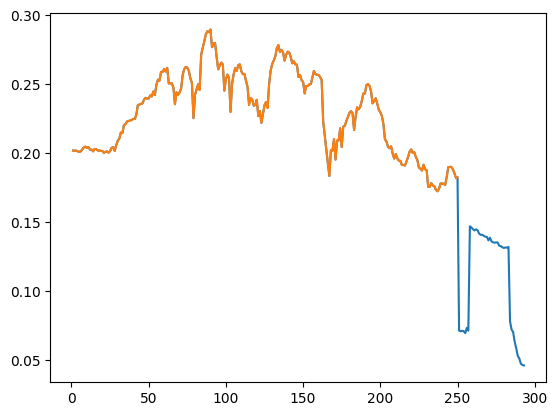

In [610]:
plt.plot([x[1] for x in logits_37], [x[0] for x in logits_37])
plt.plot([x[1] for x in stuff38], [x[0] for x in stuff38])
plt.show()

In [625]:
data[38]

(39, [90])

In [591]:
CLIP_g[37]

66

In [600]:
IV_g8[37] = 72

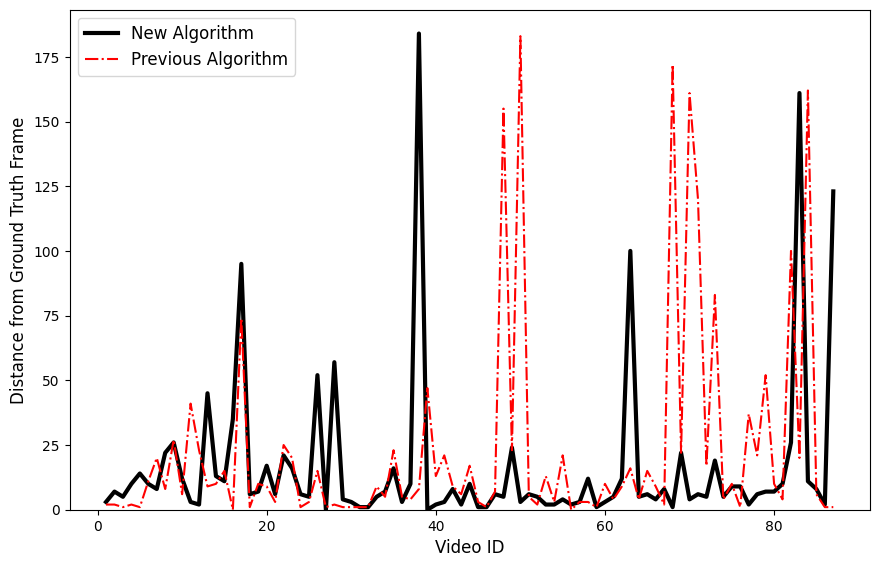

In [624]:
compare = 'IV_g8,CLIP_g'

names = compare.split(',')
compare = [eval(x) for x in names]

# offsets = [find_best_offset(x) for x in compare]

plt.figure(figsize=[8, 5])

plt.plot(range(1, 88),showMetric2(compare[0]), linewidth=3, color="black")
plt.plot(range(1, 88),showMetric2(compare[1]), color="red", linestyle="dashdot")
# for model in range(len(names)):
    # plt.plot(range(50),showMetric2([x + offsets[model] for x in compare[model]]))

# plt.xticks(np.arange(1, 50, 1))
# plt.xlim(35, 40)

plt.gca().set_ylim(bottom=0)
# plt.yticks(np.arange(0, 300, 50))

plt.xlabel("Video ID", fontsize=12)
plt.ylabel("Distance from Ground Truth Frame", fontsize=12)
plt.legend(["New Algorithm", "Previous Algorithm"], fontsize=12)
# plt.title("Regular Dataset")

plt.gca().set_position([0, 0, 1, 1])
plt.savefig("8-compare-r.svg", bbox_inches = "tight")
plt.show()

In [ ]:
compare = [IV_a8, CLIP_a]

offsets = [find_best_offset(x) for x in compare]

plt.figure(figsize=[8, 6])
plt.plot(range(50),showMetric2([x + offsets[0] for x in compare[0]]), linewidth=3, color="black")
plt.plot(range(50),showMetric2([x + offsets[1] for x in compare[1]]), color="red", linestyle="dashdot")

# plt.xticks(np.arange(1, 50, 1))
# plt.xlim(20, 25)
plt.legend(["Sliding Window Technique", "Using CLIP Model Directly"])
# plt.axis('off')

plt.gca().set_position([0, 0, 1, 1])
plt.savefig("output2.svg", bbox_inches = "tight")
plt.show()

In [ ]:
plt.figure(figsize=[6, 6])
plt.scatter(range(1, 50),showMetric2([x + 2 for x in cut_intern]), marker = "*", s = 9)
plt.scatter(range(1, 50),showMetric2([x - 1 for x in cut_clip]), marker='o', s = 9)
# plt.plot(range(1, 50),showMetric2([x + 2 for x in cut_intern_l]))

# plt.xticks(np.arange(1, 50, 1))
# plt.xlim(20, 30)
plt.legend(["Sliding Window Technique", "Using CLIP Model Directly"])
# plt.axis('off')

plt.gca().set_position([0, 0, 1, 1])
plt.savefig("test.svg")
plt.show()

In [455]:
def arenaMetric(model1, model2):
    exec(f"{model1}_score = 0")
    exec(f"{model2}_score = 0")
    tie_score = 0

    offsets = [find_best_offset(x) for x in [eval(model1), eval(model2)]]
    pred1, pred2 = [x + offsets[0] for x in eval(model1)], [x + offsets[1] for x in eval(model2)]
    
    for idx in range(len(pred1)):
        peak1 = findClosest(pred1[idx], data[idx][1])
        peak2 = findClosest(pred2[idx], data[idx][1])
        
        if abs(pred1[idx] - peak1) < abs(pred2[idx] - peak2):
            exec(f"{model1}_score += 1")
        elif abs(pred1[idx] - peak1) > abs(pred2[idx] - peak2):
            exec(f"{model2}_score += 1")
        else:
            tie_score += 1
    print(f"{model1} Score  :",eval(f"{model1}_score"))
    print(f"{model2} Score  :",eval(f"{model2}_score"))
    print("Tied          :",tie_score)

arenaMetric('IV_a100', 'CLIP_a')

IV_a100 Score  : 45
CLIP_a Score  : 5
Tied          : 0


In [ ]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import clear_output

def load_basketball(basketball_path, size):
    basketball = Image.open(basketball_path)
    basketball = basketball.resize((size, size), Image.LANCZOS)
    return basketball

def rotate_basketball(basketball):
    random_angle = np.random.randint(0, 360)
    return basketball.rotate(random_angle, expand=True)

def add_basketball_to_frame(frame, basketball):
    frame_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    basketball_rotated = rotate_basketball(basketball)

    frame_width, frame_height = frame_pil.size
    basketball_width, basketball_height = basketball_rotated.size

    max_x = frame_width - basketball_width
    max_y = frame_height - basketball_height
    rand_x = np.random.randint(0, max_x)
    rand_y = np.random.randint(0, max_y)

    frame_pil.paste(basketball_rotated, (rand_x, rand_y), basketball_rotated)
    return cv2.cvtColor(np.array(frame_pil), cv2.COLOR_RGB2BGR)

def process_video(input_video_path, output_video_path, basketball_path, basketball_size):
    basketball = load_basketball(basketball_path, basketball_size)
    cap = cv2.VideoCapture(input_video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')

    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    count = 1
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        count += 1
        clear_output(wait=True)
        frame_with_basketball = add_basketball_to_frame(frame, basketball)

        plt.title(str(count))
        plt.imshow(frame)
        plt.show()
        out.write(frame_with_basketball)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

input_video_path = 'augment/9.mp4'
output_video_path = 'augment/92.mp4'
basketball_path = 'augment_utils/cruise.png'
basketball_size = 1

process_video(input_video_path, output_video_path, basketball_path, basketball_size)

In [501]:
import os
import shutil
from moviepy.editor import VideoFileClip

input_folder = 'gifs'
output_folder = 'GIF87'

os.makedirs(output_folder, exist_ok=True)

new_files = []
for filename in os.listdir(input_folder):
    file_path = os.path.join(input_folder, filename)
    
    if filename.endswith('.mp4'):
        shutil.copy(file_path, os.path.join(output_folder, filename))
        new_files.append(file_path)
    else:
        output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + '.mp4')
        clip = VideoFileClip(file_path)
        clip.write_videofile(output_path)
        clip.close()

Moviepy - Building video GIF87/21.mp4.
Moviepy - Writing video GIF87/21.mp4



Moviepy - Done !
Moviepy - video ready GIF87/21.mp4
Moviepy - Building video GIF87/34.mp4.
Moviepy - Writing video GIF87/34.mp4



Moviepy - Done !
Moviepy - video ready GIF87/34.mp4
Moviepy - Building video GIF87/36.mp4.
Moviepy - Writing video GIF87/36.mp4



Moviepy - Done !
Moviepy - video ready GIF87/36.mp4
Moviepy - Building video GIF87/23.mp4.
Moviepy - Writing video GIF87/23.mp4



Moviepy - Done !
Moviepy - video ready GIF87/23.mp4
Moviepy - Building video GIF87/37.mp4.
Moviepy - Writing video GIF87/37.mp4



Moviepy - Done !
Moviepy - video ready GIF87/37.mp4
Moviepy - Building video GIF87/33.mp4.
Moviepy - Writing video GIF87/33.mp4



Moviepy - Done !
Moviepy - video ready GIF87/33.mp4
Moviepy - Building video GIF87/27.mp4.
Moviepy - Writing video GIF87/27.mp4



Moviepy - Done !
Moviepy - video ready GIF87/27.mp4
Moviepy - Building video GIF87/26.mp4.
Moviepy - Writing video GIF87/26.mp4



Moviepy - Done !
Moviepy - video ready GIF87/26.mp4
Moviepy - Building video GIF87/32.mp4.
Moviepy - Writing video GIF87/32.mp4



Moviepy - Done !
Moviepy - video ready GIF87/32.mp4


Moviepy - Building video GIF87/18.mp4.
Moviepy - Writing video GIF87/18.mp4



Moviepy - Done !
Moviepy - video ready GIF87/18.mp4


Moviepy - Building video GIF87/24.mp4.
Moviepy - Writing video GIF87/24.mp4



Moviepy - Done !
Moviepy - video ready GIF87/24.mp4
Moviepy - Building video GIF87/30.mp4.
Moviepy - Writing video GIF87/30.mp4



Moviepy - Done !
Moviepy - video ready GIF87/30.mp4


Moviepy - Building video GIF87/31.mp4.
Moviepy - Writing video GIF87/31.mp4



Moviepy - Done !
Moviepy - video ready GIF87/31.mp4
Moviepy - Building video GIF87/25.mp4.
Moviepy - Writing video GIF87/25.mp4



Moviepy - Done !
Moviepy - video ready GIF87/25.mp4


Moviepy - Building video GIF87/42.mp4.
Moviepy - Writing video GIF87/42.mp4



Moviepy - Done !
Moviepy - video ready GIF87/42.mp4


Moviepy - Building video GIF87/4.mp4.
Moviepy - Writing video GIF87/4.mp4



Moviepy - Done !
Moviepy - video ready GIF87/4.mp4


Moviepy - Building video GIF87/57.mp4.
Moviepy - Writing video GIF87/57.mp4



Moviepy - Done !
Moviepy - video ready GIF87/57.mp4
Moviepy - Building video GIF87/5.mp4.
Moviepy - Writing video GIF87/5.mp4



Moviepy - Done !
Moviepy - video ready GIF87/5.mp4
Moviepy - Building video GIF87/7.mp4.
Moviepy - Writing video GIF87/7.mp4



Moviepy - Done !
Moviepy - video ready GIF87/7.mp4
Moviepy - Building video GIF87/55.mp4.
Moviepy - Writing video GIF87/55.mp4



Moviepy - Done !
Moviepy - video ready GIF87/55.mp4


Moviepy - Building video GIF87/41.mp4.
Moviepy - Writing video GIF87/41.mp4



Moviepy - Done !
Moviepy - video ready GIF87/41.mp4
Moviepy - Building video GIF87/83.mp4.
Moviepy - Writing video GIF87/83.mp4



Moviepy - Done !
Moviepy - video ready GIF87/83.mp4
Moviepy - Building video GIF87/40.mp4.
Moviepy - Writing video GIF87/40.mp4



Moviepy - Done !
Moviepy - video ready GIF87/40.mp4
Moviepy - Building video GIF87/6.mp4.
Moviepy - Writing video GIF87/6.mp4



Moviepy - Done !
Moviepy - video ready GIF87/6.mp4
Moviepy - Building video GIF87/54.mp4.
Moviepy - Writing video GIF87/54.mp4



Moviepy - Done !
Moviepy - video ready GIF87/54.mp4
Moviepy - Building video GIF87/2.mp4.
Moviepy - Writing video GIF87/2.mp4



Moviepy - Done !
Moviepy - video ready GIF87/2.mp4
Moviepy - Building video GIF87/44.mp4.
Moviepy - Writing video GIF87/44.mp4



Moviepy - Done !
Moviepy - video ready GIF87/44.mp4
Moviepy - Building video GIF87/87.mp4.
Moviepy - Writing video GIF87/87.mp4



Moviepy - Done !
Moviepy - video ready GIF87/87.mp4
Moviepy - Building video GIF87/86.mp4.
Moviepy - Writing video GIF87/86.mp4



Moviepy - Done !
Moviepy - video ready GIF87/86.mp4
Moviepy - Building video GIF87/45.mp4.
Moviepy - Writing video GIF87/45.mp4



Moviepy - Done !
Moviepy - video ready GIF87/45.mp4
Moviepy - Building video GIF87/51.mp4.
Moviepy - Writing video GIF87/51.mp4



Moviepy - Done !
Moviepy - video ready GIF87/51.mp4
Moviepy - Building video GIF87/3.mp4.
Moviepy - Writing video GIF87/3.mp4



Moviepy - Done !
Moviepy - video ready GIF87/3.mp4
Moviepy - Building video GIF87/47.mp4.
Moviepy - Writing video GIF87/47.mp4



Moviepy - Done !
Moviepy - video ready GIF87/47.mp4
Moviepy - Building video GIF87/1.mp4.
Moviepy - Writing video GIF87/1.mp4



Moviepy - Done !
Moviepy - video ready GIF87/1.mp4
Moviepy - Building video GIF87/53.mp4.
Moviepy - Writing video GIF87/53.mp4



Moviepy - Done !
Moviepy - video ready GIF87/53.mp4
Moviepy - Building video GIF87/52.mp4.
Moviepy - Writing video GIF87/52.mp4



Moviepy - Done !
Moviepy - video ready GIF87/52.mp4


Moviepy - Building video GIF87/74.mp4.
Moviepy - Writing video GIF87/74.mp4



Moviepy - Done !
Moviepy - video ready GIF87/74.mp4
Moviepy - Building video GIF87/60.mp4.
Moviepy - Writing video GIF87/60.mp4



Moviepy - Done !
Moviepy - video ready GIF87/60.mp4


Moviepy - Building video GIF87/49.mp4.
Moviepy - Writing video GIF87/49.mp4



Moviepy - Done !
Moviepy - video ready GIF87/49.mp4
Moviepy - Building video GIF87/58.mp4.
Moviepy - Writing video GIF87/58.mp4



Moviepy - Done !
Moviepy - video ready GIF87/58.mp4
Moviepy - Building video GIF87/8.mp4.
Moviepy - Writing video GIF87/8.mp4



Moviepy - Done !
Moviepy - video ready GIF87/8.mp4


Moviepy - Building video GIF87/9.mp4.
Moviepy - Writing video GIF87/9.mp4



Moviepy - Done !
Moviepy - video ready GIF87/9.mp4
Moviepy - Building video GIF87/28.mp4.
Moviepy - Writing video GIF87/28.mp4



Moviepy - Done !
Moviepy - video ready GIF87/28.mp4
Moviepy - Building video GIF87/29.mp4.
Moviepy - Writing video GIF87/29.mp4



Moviepy - Done !
Moviepy - video ready GIF87/29.mp4


Moviepy - Building video GIF87/13.mp4.
Moviepy - Writing video GIF87/13.mp4



Moviepy - Done !
Moviepy - video ready GIF87/13.mp4
Moviepy - Building video GIF87/39.mp4.
Moviepy - Writing video GIF87/39.mp4



Moviepy - Done !
Moviepy - video ready GIF87/39.mp4
Moviepy - Building video GIF87/10.mp4.
Moviepy - Writing video GIF87/10.mp4



Moviepy - Done !
Moviepy - video ready GIF87/10.mp4


In [504]:
print(sorted([int(x.split('/')[-1].split('.')[0]) for x in new_files]))

[11, 12, 14, 15, 16, 17, 19, 20, 22, 35, 38, 43, 46, 48, 50, 56, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85]
